In [33]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
img_origin = cv2.imread('../Background Remover/Potato_Leaf_Outputs/removed_bcgrnd_Early_Blight_1.jpg')
img = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)

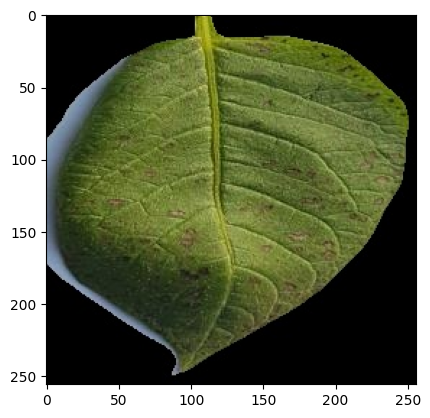

In [56]:
plt.imshow(img)

In [57]:
# Making mask threshold
lower = np.array([5, 5, 5])
higher = np.array([250, 250, 250])
mask = cv2.inRange(img, lower, higher)

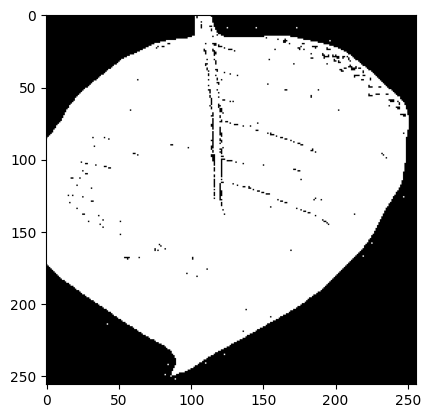

In [58]:
plt.imshow(mask, 'gray')

In [59]:
cont, hierarcy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cont to store all contours in the image
# hierarcy to store the length of first point to the end point

Here's a breakdown of the parameters and variables in the code:

- mask: The binary mask image from which contours will be extracted. The mask is typically obtained through image processing operations such as thresholding or segmentation.
- cv2.RETR_EXTERNAL: The retrieval mode for the contours. RETR_EXTERNAL retrieves only the external contours, meaning it ignores any internal contours or holes within objects.
- cv2.CHAIN_APPROX_NONE: The contour approximation method. CHAIN_APPROX_NONE retrieves all contour points, without approximating or reducing the number of points.

The cv2.findContours() function returns two values:

- cont: A list of contours found in the image. Each contour is represented as a numpy array of shape (N, 1, 2), where N is the number of points in the contour.
- hierarchy: A numpy array that represents the hierarchy of contours. It contains information about the relationships between contours, such as the parent-child relationship and whether a contour has any child contours.

After executing cv2.findContours(), the cont variable will store all the contours found in the image, and the hierarchy variable will store the contour hierarchy information.

You can then use the cont variable to access individual contours and perform further operations on them, such as drawing them on an image using cv2.drawContours(), calculating their areas, or extracting specific contour features. The hierarchy variable can be used to navigate the contour hierarchy if needed, to identify parent-child relationships between contours.

In [60]:
count_img = cv2.drawContours(img, cont, -1, 255, 3)

The parameters of the cv2.drawContours() function are as follows:

- img: The image on which the contours will be drawn.
- cont: The contours to be drawn on the image. Contours are typically obtained from the cv2.findContours() function.
- -1: Specifies the index of contours to draw. Use -1 to draw all contours.
- 255: The color of the contours. In this case, 255 represents white, as the value is set to the maximum intensity for a grayscale image.
- 3: The thickness of the contour lines in pixels.

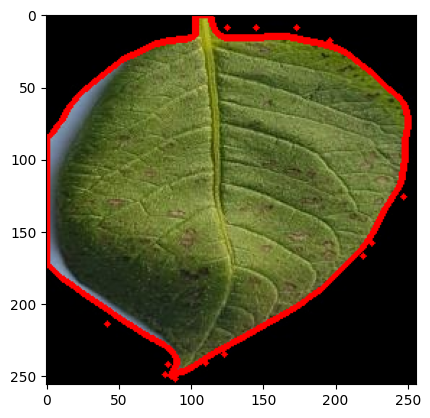

In [61]:
plt.imshow(count_img)

In [62]:
max_cont = max(cont, key = cv2.contourArea) # Finding the maximum value from an iterable using a key function

words = ['apple', 'banana', 'cherry']

max_length_word = max(words, key=len)  # Returns 'banana'


In [63]:
x,y,w,h = cv2.boundingRect(max_cont)

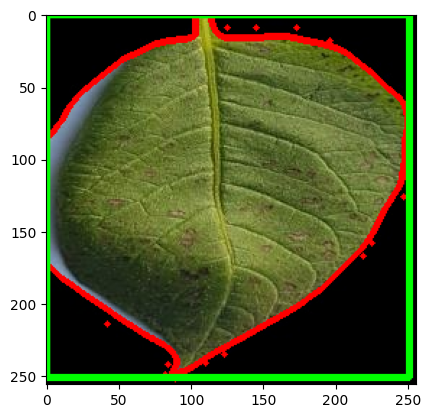

In [64]:
cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3)
plt.imshow(img)

In [65]:
cropped_img = img[y:y+h, x:x+w]

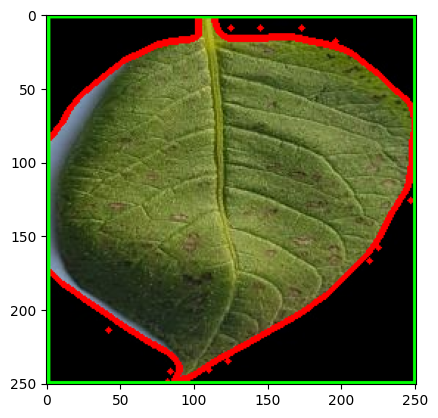

In [66]:
plt.imshow(cropped_img)

In [67]:
cropped_img_ori = img_origin[y:y+h, x:x+w]

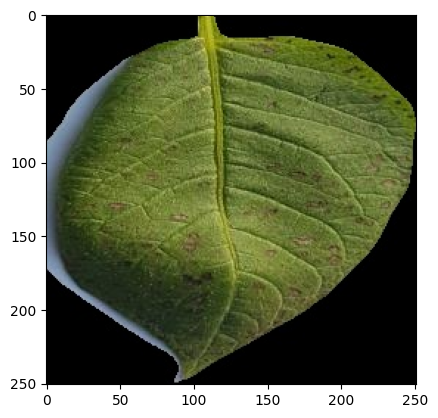

In [68]:
plt.imshow(cropped_img_ori)